In [50]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
#loading the dataset
df = pd.read_csv('BostonHousing.csv')
print(df.head())#printing first 5 values of dataset

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [52]:
print(df.tail())#printing the last 5 values of dataset

        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

          b  lstat  medv  
501  391.99   9.67  22.4  
502  396.90   9.08  20.6  
503  396.90   5.64  23.9  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9  


In [53]:
print(df.shape)#checking number of columns and rows

(506, 14)


In [54]:
print(df.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [55]:
print(df.isnull().sum())#checking is there any null values present in the dataset

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [56]:
# Using iloc to split independent and dependent variables
x = df.iloc[:, :-1]  # All rows, all columns except the last one (target)
y = df.iloc[:, -1]   # All rows, only the last column (target)

# Display the first few rows to check
print(x.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [57]:
print(y.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64


In [58]:
#split into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
#initialize the model
model = LinearRegression()

#train the model
model.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred = model.predict(x_test)


In [61]:
# Compare predictions with actual values
print("Predicted values:\n", y_pred)
print("\nActual values:\n", y_test.values)  # y_test is a pandas Series, so we use `.values` to get the raw array


Predicted values:
 [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548695  8.87931901 20.8307

In [62]:
#create a dataframe to show both actual values and predicted values
comparison_df=pd.DataFrame({
    'actual values': y_test.values,
    'predicted values': y_pred
})

print(comparison_df.head(20))

    actual values  predicted values
0            23.6         28.996724
1            32.4         36.025565
2            13.6         14.816944
3            22.8         25.031979
4            16.1         18.769880
5            20.0         23.254429
6            17.8         17.662538
7            14.0         14.341190
8            19.6         23.013207
9            16.8         20.632456
10           21.5         24.908505
11           18.9         18.638836
12            7.0         -6.088422
13           21.2         21.758347
14           18.5         19.239226
15           29.8         26.193197
16           18.8         20.647733
17           10.2          5.794727
18           50.0         40.500340
19           14.1         17.612891


In [63]:
from sklearn.metrics import mean_squared_error,r2_score
#calculate mean squared error
#MSE gives an idea of how well the model performs.
#A lower value of MSE indicates better model performance (i.e., the predictions are closer to the actual values).
mse=mean_squared_error(y_test,y_pred)

print(f"mean squared error: {mse}")

#calculate r-squared

r2=r2_score(y_test,y_pred)
print(f"R-squared: {r2}")


mean squared error: 24.291119474973538
R-squared: 0.6687594935356317


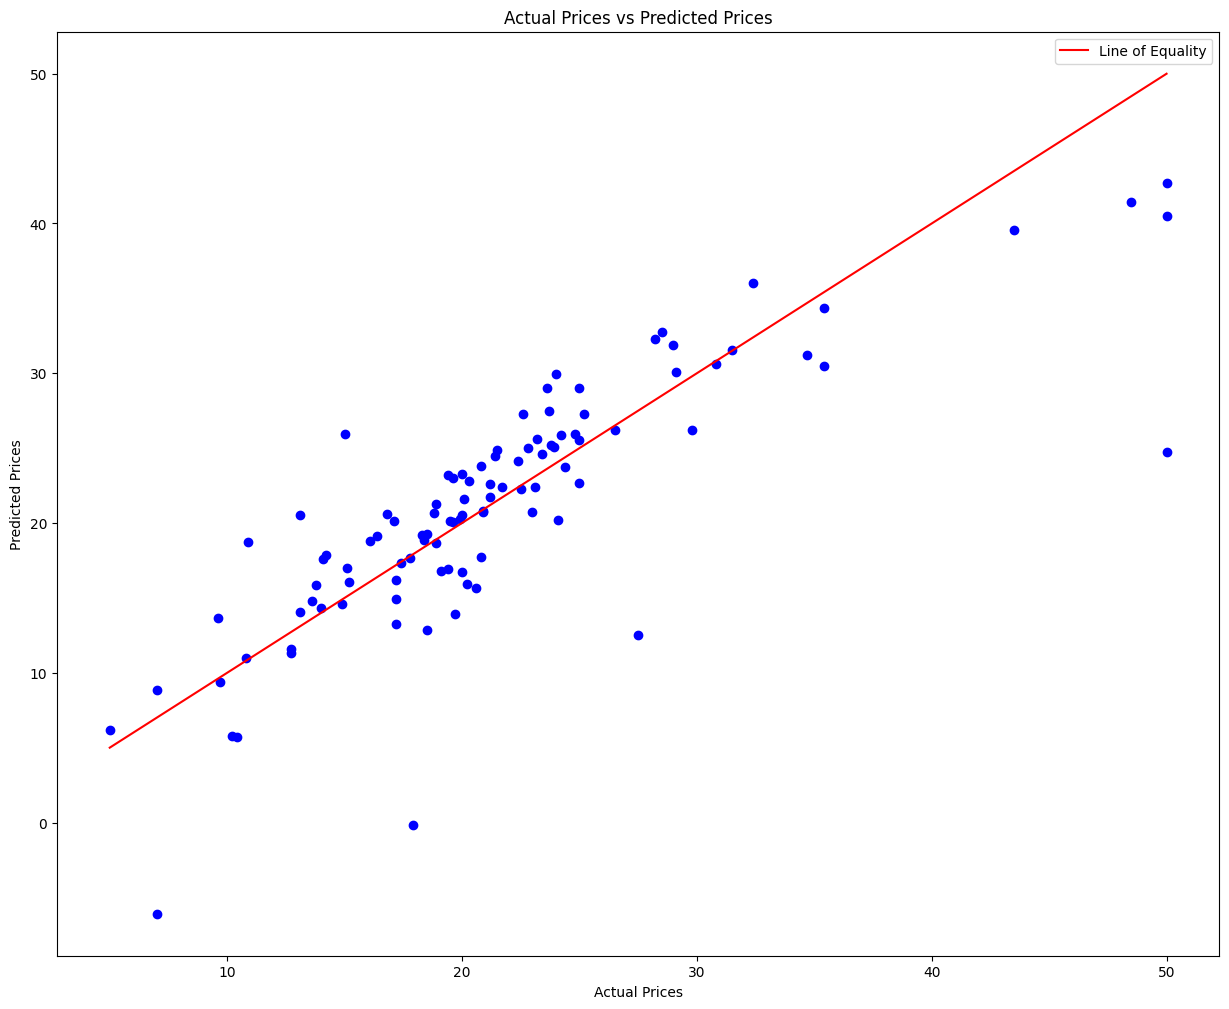

In [64]:

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(15, 12))

# Scatter plot with customized styling
plt.scatter(y_test, y_pred, color='blue')

# Plot the line of equality (ideal case where predicted = actual)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', label="Line of Equality")

# Add labels and title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

# Add legend to indicate the line of equality
plt.legend()

# Display the plot
plt.show()
